<a id="section_introduccion"></a>

## Boosting
### Introducción
Como mencionamos antes, existen modelos de árboles de decisión simples, y árboles de decisión de Ensamble. Vimos también que los primeros, si bien son fáciles de interpretar, no pertenecen al grupo de modelos que ofrecen mayor precisión y que ésto se debía en gran medida a la varianza propia de dichos modelos. Como alternativa superadora surgieron los árboles de decisión por ensamble. Los modelos de Ensamble logran reducir la varianza inherente de los árboles de decisión y han logrados muy buenos resultados en cuanto a la precisión alcanzada, sin embargo ésto es a costa de perder la facilidad de interpretación que poseían los árboles de decisión simples.  
  

<a id="section_boosting"></a>
### Boosting:
Boosting es otra técnica de agregación que veremos. La principal diferencia con las técnicas que vimos anteriormente, es que en ellas se entrenaban los modelos independientemente para luego generar un meta-modelo. En el caso de Boosting, se entrenan los modelos de manera secuencial donde cada modelo aprende de los errores del modelo predecesor.

Las técnicas de boosting más conocidas son:
- ADA Boost
- Gradient Boosting

Veamos cada una de ellas:


**1) ADA Boost:**

El nombre ADA proviene de Adaptative Boosting, que hace referencia a su capacidad de Adaptar la importancia de los predictores asignándole mayor peso a aquellos sobre los que se comete más error. Es importante destacar que mientras en Random Forest mencionamos que a los árboles no se los poda, en el casode Adaboost sucede todo lo contrario: se suelen usar árboles de 1 nodo raíz y 2 nodos hojas. A este tipo de árboles se los conoce como **stump**. Por otro lado, mientras que en Random Forest cada árbol tenía igual voto sobre la predicción final, en el caso de ADA Boost tenemos que los votos de los **stumps** pueden tener más pesos unos que otros.  

Tal como mencionamos los métodos de boosting trabajan por definición secuencialmente, con lo cual cada **stump** va a "aprender" de la secuencia anterior. Al primer stump se lo va a entrenar con un dataset al cual se le va a asignar los mismos pesos a cada observación (fila). De esta manera si nuestro dataset tiene un total de K observaciones, entonces cada observación tendrá un peso de 1/K siendo todas igual de "importantes".

Luego se elige el feature que genera la menor entropía o gini y se crea el primer stump con dicho feature. Calculamos ahora la importancia de dicho árbol (o cuanto peso tendrá su voto sobre la predicción del meta-modelo) dependiendo de la cantidad de error que cometió. Este error lo calculamos sumando los pesos de todas las observaciones que fueron mal clasificadas (este valor va a estar dentro del rango entre 0 y 1).
- Si es 1 significa que no logró clasificar nada correctamente y por ende tendra muy poco voto en la predicción final.
- Si es 0 significa que clasifico todo perfectamente y por ende tendrá mayor voto en la predicción final.

A su vez, para asegurarnos que el siguiente stump pueda aprender del precursor, realizamos un ajuste de los pesos de cada observación del dataset. Ahora ya no serán todas las observaciones de igual peso o importancia, sino que se le dará mayor peso a aquellos observaciones que fueron mal clasificadas, y consecuentemente se le restará peso a aquellas que fueron correctamente clasificadas, de modo que siempre la suma total de pesos sea igual a 1.

Ahora el segundo Stump va a utilizar weighted Gini index para seleccionar la mejor partición, y a continuación se repiten todos los pasos:
- se calcula el error total de este stump para asignarle el peso a su voto.
- se vuelven a recalcular los pesos de cada observacion para entrenar al siguiente stump.



En este [link](https://www.youtube.com/watch?v=k4G2VCuOMMg) podemos ver el algoritmo en acción.

Este algoritmo es muy potente pero tiene desventajas como:

* Puede producir overfitting (el peso a los outliers va creciendo)
* No es interpretable
* No es multiclase (existen variantes como Adaboost.M1 que sí lo son)


La predicción del meta-modelo estará luego conformada de la siguiente manera:
- Clasificador:
    - Voto con pesos
    - En sklearn: `AdaBoostClassifier`
- Regresión:
    - Promedio ponderado
    - En sklearn: `AdaBoostRegressor`

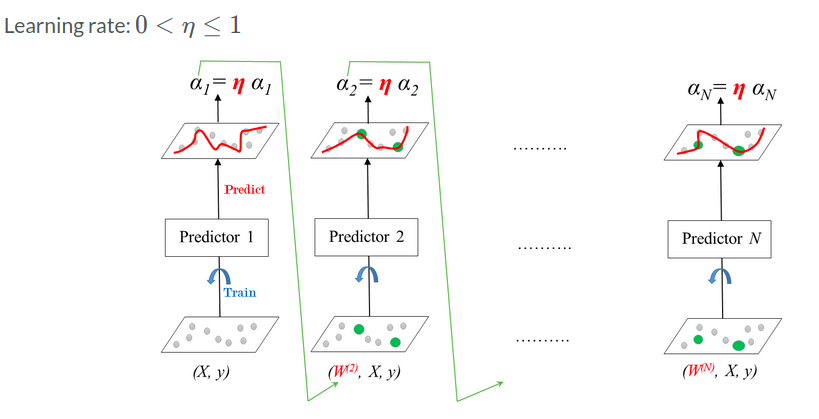

**2) Gradient Boost:**

Gradient boosting es un método de aprendizaje lento donde los sucesivos modelos de árboles de decisión son entrenados para predecir los residuales del árbol antecesor permitiendo que los resultados de los modelos subsiguientes sean agregados y corrijan los errores promediando las predicciones. Para determinar los parámetros que tendrán cada uno de los árboles de decisión agregados al modelo se utiliza un procedimiento descenso por gradiente que minimizará la función de perdida. De esta forma se van agregando árboles con distintos parámetros de forma tal que la combinación de ellos minimiza la pérdida del modelo y mejora la predicción.

La diferencia con adaboost es que ya no pesamos cada punto independientemente, sino que proponemos una función de error cuyo gradiente tenemos que minimizar. El hiperparámetro de Learning Rate ($\eta$) es un escalar entre 0 < $\eta$ < 1 que multiplica los residuales para asegurar convergencia. A medida que se reduce el valor de $\eta$ es recomendable aumentar el número de estimadores N.


La predicción del meta-modelo estará luego conformada de la siguiente manera:

$y_{pred} = y_1 + \eta r_1 + ... +  \eta r_N$


Árboles de decisión con Gradient boosting es uno de los modelos más poderosos y más utilizados para problemas de aprendizaje supervisado. Su principal inconveniente es que requieren un ajuste cuidadoso de los parámetros y puede requerir mucho tiempo de entrenamiento.

### scikit learn


### `AdaBoostClassifier()`

* `base_estimator`: análogo al caso de `BaggingClassifier()`, el estimador sobre el cual se va a construir el ensamble. Por efecto, son árboles de decisión.
* `n_estimators`: el máximo de iteraciones
* `learning_rate`: el peso que va a tener la predicción de cada árbol en el ensamble final


### `GradientBoostingClassifier()`

Se trata de una generalización del algoritmo general de Boosting para cualquier tipo de función de pérdida diferenciable. En cada etapa, se fitea un árbol de decisión pero se realiza sobre los residuos del árbol anterior. Es decir, se busca corregir las estimaciones entrenando nuevos clasificadores sobre los "residuos" (la diferencia entre el valor observado y el valor predico ($y - \hat{y}$)

Los argumentos que toma como input son ya conocidos:

* `learning_rate`: el peso que va a tener la predicción de cada árbol en el ensamble final

* `n_estimators`: el máximo de iteraciones
* `criterion`: define el criterio de impureza para evaluar la calidad de las particiones
* `max_features`: la cantidad de features que extraerá para entrenar cada `base_estimator`. Por default es igual a `sqrt(X.shape[1])`
* `bootstrap` y `bootstrap_features`: controla si tanto los n_samples como las features son extraidos con reposición.
* `max_depth`: la pronfundidad máxima del árbol
* `min_samples_leaf`: el número mínimo de n_samples para constituir una hoja del árbol (nodo terminal)
* `min_samples_split`: el número mínimo de n_samples para realizar un split.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
names = ['buying','maint','doors','persons','lug_boot','safety','acceptability']
df = pd.read_csv(url,names=names)
df.dtypes

buying           object
maint            object
doors            object
persons          object
lug_boot         object
safety           object
acceptability    object
dtype: object

Esta vez vamos a codificar los atributos usando un esquema One Hot, es decir, los consideraremos como variables categóricas. También vamos a codificar el target usando el `LabelEncoder`.

In [3]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
lab_enc.fit(df['acceptability'])

LabelEncoder()

In [4]:
y = lab_enc.transform(df['acceptability'])
X = pd.get_dummies(df.drop('acceptability', axis=1))

X.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
1,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,False,True
2,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False
3,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
4,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True


Hacemos el split entre train y test sets.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41, stratify=y)

Para que los resultados sean consistentes hay que exponer los modelos exactamente al mismo esquema de validación cruzada.

In [ ]:
# Evaluación de rendimiento con validación cruzada

# Este bloque define una función para medir el desempeño de un modelo de clasificación usando **cross-validation estratificada**.

from sklearn.model_selection import cross_val_score, StratifiedKFold

# Definir esquema de validación cruzada estratificada
cv = StratifiedKFold(n_splits=3, random_state=41, shuffle=True)

# Función para evaluar un modelo
def evaluar_rendimiento(modelo, nombre, X_train, y_train, cv):
    """
    Evalúa el rendimiento de un modelo usando cross-validation.

    Parámetros:
    - modelo: modelo de scikit-learn a evaluar
    - nombre: string, nombre del modelo para imprimir resultados
    - X_train, y_train: datos de entrenamiento
    - cv: objeto de validación cruzada (ej. StratifiedKFold)

    Salida:
    - Imprime la media y desviación estándar de la precisión
    """
    s = cross_val_score(modelo, X_train, y_train, cv=cv, n_jobs=-1)
    print(f"Rendimiento de {nombre}:\t{s.mean().round(3):0.3} ± {s.std().round(3):0.3}")


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

ab = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, random_state=1), n_estimators=100)
gb = GradientBoostingClassifier()
evaluar_rendimiento(ab, "AdaBoostClassifier",  X_train, y_train, cv)
evaluar_rendimiento(gb, "GradientBoostingClassifier", X_train, y_train, cv)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Rendimiento de AdaBoostClassifier:	0.859 ± 0.015
Rendimiento de GradientBoostingClassifier:	0.969 ± 0.017


Puede verse, entonces, que AdaBoost performa bastante peor (al menos utilizando los parámetros por defecto). De esta forma, podríamos tratar de tunear los hiperparámetros para hacerlo funcionar mejor.

In [ ]:
from sklearn.model_selection import GridSearchCV

params_ab = {"n_estimators": [100, 500], "learning_rate":[0.01, 0.1, 1.0], "estimator__max_depth": [1, 2, 3]}

grid_ab = GridSearchCV(AdaBoostClassifier(estimator=DecisionTreeClassifier()),
                       param_grid=params_ab, cv=cv, verbose=1, n_jobs=-1)


In [9]:
grid_ab.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=41, shuffle=True),
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [100, 500]},
             verbose=1)

In [10]:
grid_ab.best_estimator_

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.01, n_estimators=500)

In [11]:
evaluar_rendimiento(grid_ab,  "AdaBoostClassifier + GS", X_train, y_train, cv)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Rendimiento de AdaBoostClassifier + GS:	0.918 ± 0.027


In [12]:
params_gb = {'n_estimators':[100, 500] ,
             'learning_rate':[0.001, 0.001, 0.1, 1.0],
            'max_depth' : [1, 2, 3, 4]}

grid_gb = GridSearchCV(gb, param_grid=params_gb, cv=cv, verbose=1, n_jobs=3)

In [13]:
grid_gb.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=41, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=3,
             param_grid={'learning_rate': [0.001, 0.001, 0.1, 1.0],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 500]},
             verbose=1)

In [14]:
grid_gb.best_estimator_

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, n_estimators=500)

In [ ]:
evaluar_rendimiento(grid_gb, "GradientBoostingClassifier + GS", X_train, y_train, cv)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits


En este caso si vemos una mejora en la performance del Modelo de Gradient Boosting.  
Veamos a continuacion el valor de AUC y el gráfico de ROC

In [ ]:
from sklearn.metrics import roc_auc_score
gb_auc = roc_auc_score(y_test,grid_gb.predict_proba(X_test),multi_class="ovr")
print("El valor del AUC es: ", gb_auc)

El valor del AUC es:  0.9968824573513022


In [ ]:
!pip install mljar-scikit-plot

  Preparing metadata (setup.py) ... done
  Created wheel for mljar-scikit-plot: filename=mljar_scikit_plot-0.3.12-py3-none-any.whl size=32012 sha256=7b089ebcd3fd5d851cff5d89e9e7ca7dfc026aacaacde3b3178e17f799e47675
  Stored in directory: /root/.cache/pip/wheels/f1/02/59/22b0e9bcc992a79df54193032d45720f9713bd3065617ef4a5
Successfully built mljar-scikit-plot


In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.34.2
aiohappyeyeballs                 2.4.0
aiohttp                          3.10.5
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.15
albumentations                   1.4.15
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.19.0
astropy                          6.1.3
astropy-iers-data                0.2024.9.16.0.32.21
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            24.2.0
audioread                        3.0.1
autograd               

In [ ]:
import scikitplot      # ojo con el nombre con que lo importan!
print(scikitplot.__version__)

0.3.12


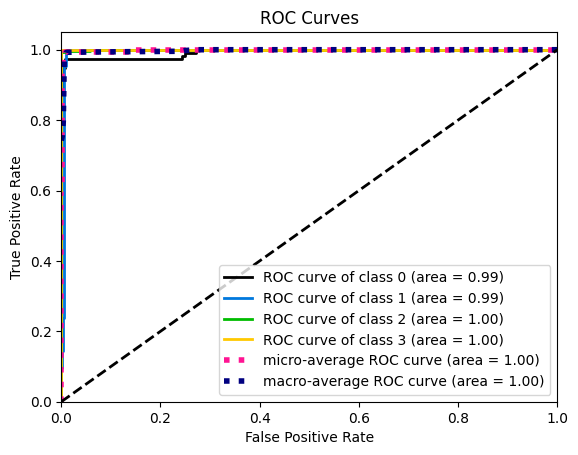

In [ ]:
from scikitplot.metrics import plot_roc

plot_roc(y_test,grid_gb.predict_proba(X_test))
plt.show()

Finalmente vamos a graficar la importancia relativa de los feature para la predicción:

In [ ]:
model = grid_gb.best_estimator_
model

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, n_estimators=500)

In [ ]:
importances = model.feature_importances_
importances*100

array([1.09414709e+00, 6.51813775e+00, 2.10666030e+00, 1.01808576e+00,
       1.53722833e+00, 1.65814938e+00, 3.64705939e-01, 2.40925826e+00,
       4.83590436e-01, 3.48378358e-02, 4.20171550e-03, 4.61172459e-02,
       3.81516901e+01, 3.54431445e-01, 4.42701939e-01, 4.40212904e-01,
       8.94992057e-02, 2.56047382e+00, 6.51702168e+00, 2.95813152e+01,
       4.58753361e+00])

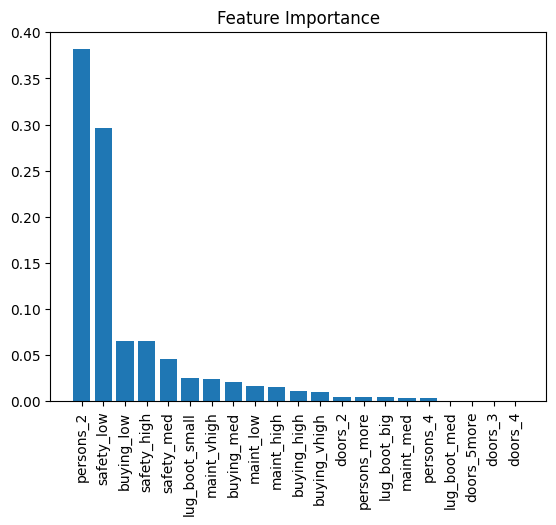

In [ ]:
# Recordamos que argsort nos devuelve un vector con indices del vector original
# tal que este quede reordenado de mayor a menor.
# https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
import matplotlib.pyplot as plt

# creamos una variable que tenga los indices indicando los valores de mayor a menor
indices = np.argsort(importances)[::-1]

# con dicha variable realizamos fancy indexing de manera de ordenar los labels del eje x.
names = X.columns[indices]

# Creamos el plot
plt.figure()

# Creamos plot title
plt.title("Feature Importance")

# Agregamos las barras
plt.bar(range(X.shape[1]), importances[indices])

# Agregamos los feature names
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()